Class    0.349609
dtype: float64
Class    0.350877
dtype: float64
훈련데이터의 혼동행렬 : 
 [[328   5]
 [  9 170]]
테스트데이터의 혼동행렬 : 
 [[106   5]
 [  2  58]]
훈련데이터의 분류예측 리포트 : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

훈련데이터의 분류예측 리포트 : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



C:\Users\external\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


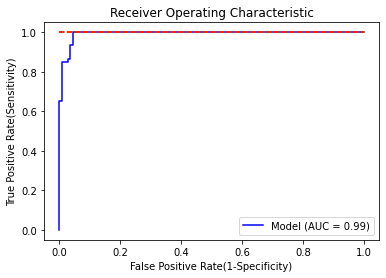

In [23]:
import pandas as pd

# 데이터 불러오기

data = pd.read_csv('breast-cancer-wisconsin.csv', encoding='utf-8')
data.head()

data['Class'].value_counts(sort=False)

data.head()

# 데이터셋 분리 (X, y : 분류문제)

X = data[data.columns[0:10]]

y = data[['Class']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y)


print(y_train.mean())
print(y_test.mean())

# 정규화

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

# pd.DataFrame(X_scaled_minmax_train).describe()
# pd.DataFrame(X_scaled_standard_train).describe()

# scaler_minmax.fit(X_test) "필요없음"
X_scaled_minmax_test = scaler_minmax.transform(X_test)

pd.DataFrame(X_scaled_minmax_test).describe()

# 모델 학습

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train) # 정확도 확인

pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

# 혼동행렬

from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터의 혼동행렬 : \n", confusion_train)

confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터의 혼동행렬 : \n", confusion_test)

from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train, pred_train)
print("훈련데이터의 분류예측 리포트 : \n", cfreport_train)

cfreport_test = classification_report(y_test, pred_test)
print("훈련데이터의 분류예측 리포트 : \n", cfreport_test)

from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc

import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate(1-Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1], 'y--')
plt.plot([0,1],[1,1], 'r--')

plt.legend(loc='lower right')
plt.show()

prob_train = model.predict_proba(X_scaled_minmax_train)

# print(pred_train.shape)

# y_train[['y_pred']]= pred_train
y_train[['y_prob0', 'y_prob1']] = prob_train
# print(y_train.shape)
y_train

prob_test = model.predict_proba(X_scaled_minmax_test)
# y_test[['y_pred']] = pred_test
y_test[['y_prob0', 'y_prob1']] = prob_test
y_test

Total_test = pd.concat([X_test, y_test], axis = 1)
Total_test

Total_test.to_csv("Classificaton Test.csv")